In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import glob

import Lyapunov_funcs ### Functs from Lyapunov proof of concept notebook

# Get data

In [102]:
path = "/Users/calumthompson/Documents/Final year project/Data/S&P500 March2015+/*"

data_merge = []

for fname in glob.glob(path):
    x = pd.read_csv(fname)
    
    data_merge.append(x)

SandP_df = pd.concat(data_merge)

In [103]:
SandP_df.columns = SandP_df.columns.str.replace("<","").str.replace(">","")

SandP_df['TIMESTAMP'] = SandP_df['DATE'].astype(str) + SandP_df['TIME'].astype(str)
SandP_df['TIMESTAMP'] = pd.to_datetime(SandP_df['TIMESTAMP'] ,format='%Y%m%d%H%M%S')
SandP_df = SandP_df.drop(axis =1, labels = ["TICKER","PER", "DATE", "TIME"])

SandP_df = SandP_df[['TIMESTAMP','OPEN','HIGH','LOW','CLOSE','VOL']]
SandP_df = SandP_df.sort_values('TIMESTAMP')
SandP_df.head()

,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOL
0,2015-03-02 09:35:00,2105.23,2106.37,2104.50,2106.27,245
1,2015-03-02 09:40:00,2106.31,2107.32,2106.31,2106.78,234
2,2015-03-02 09:45:00,2106.80,2107.29,2106.09,2106.89,234
3,2015-03-02 09:50:00,2106.91,2108.75,2106.91,2108.69,223
4,2015-03-02 09:55:00,2108.71,2109.46,2108.71,2109.24,198


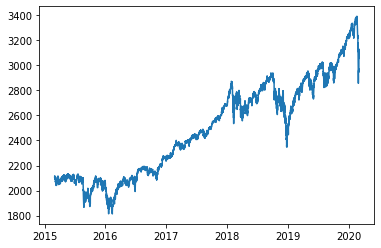

In [107]:
plt.plot(SandP_df['TIMESTAMP'], SandP_df['CLOSE'])
plt.show()

# Notes 

## Embedding dimension
- Time series is 1 dimensional therefore m > 2
- Do multiple tests to assess best embedding dimension

